<a href="https://colab.research.google.com/github/mehmetkesik/tensorflow-basics/blob/main/03_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification.

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-22 13:14:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.24.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.3MB/s    in 5.7s    

2022-11-22 13:14:18 (18.2 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class name progmmatically.

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['1219039.jpg']
Image shape: (384, 512, 3)


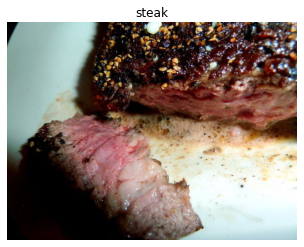

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[  2,   2,   4],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [179, 192, 208],
        [185, 201, 201],
        [151, 168, 160]],

       [[  2,   2,   4],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [205, 187, 187],
        [195, 164, 161],
        [177, 136, 132]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [194, 147, 131],
        [190, 128, 115],
        [200, 130, 120]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [168, 202, 211],
        [169, 203, 212],
        [169, 203, 212]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [167, 201, 210],
        [168, 202, 211],
        [168, 202, 211]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [166, 200, 20

In [ ]:
img.shape

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.70196078, 0.75294118, 0.81568627],
        [0.7254902 , 0.78823529, 0.78823529],
        [0.59215686, 0.65882353, 0.62745098]],

       [[0.00784314, 0.00784314, 0.01568627],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.80392157, 0.73333333, 0.73333333],
        [0.76470588, 0.64313725, 0.63137255],
        [0.69411765, 0.53333333, 0.51764706]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.76078431, 0.57647059, 0.51372549],
        [0.74509804, 0.50196078, 0.45098039],
        [0.78431373, 0.50980392, 0.47058824]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers

tf.random.set_seed(42)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

normalization_layer = layers.Rescaling(1./255)

train_data = image_dataset_from_directory(
    train_dir,
    seed=42,
    image_size=(224, 224),
    batch_size=32
)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y)) # Rescale our data 0 & 1 using map and keras.layers.Rescaling

valid_data = image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size=(224, 224),
    batch_size=32
).map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
#for (X, y) in train_data:
  #print(X)

In [ ]:
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    #tf.keras.layers.Activations(tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                       
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 17s 102ms/step - loss: 0.5964 - accuracy: 0.6800 - val_loss: 0.4550 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 2s 40ms/step - loss: 0.4525 - accuracy: 0.7920 - val_loss: 0.5048 - val_accuracy: 0.7540
Epoch 3/5
47/47 [==============================] - 2s 39ms/step - loss: 0.4416 - accuracy: 0.7927 - val_loss: 0.3754 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 2s 39ms/step - loss: 0.3946 - accuracy: 0.8293 - val_loss: 0.3470 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 2s 39ms/step - loss: 0.3623 - accuracy: 0.8427 - val_loss: 0.3399 - val_accuracy: 0.8460


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29160)             0

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image.

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 1s 13ms/step - loss: 1.3170 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 0s 10ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Improve model_2

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 1s 16ms/step - loss: 3.4676 - accuracy: 0.6307 - val_loss: 0.4825 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 1s 14ms/step - loss: 0.6629 - accuracy: 0.7460 - val_loss: 0.5552 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 1s 14ms/step - loss: 0.6133 - accuracy: 0.7447 - val_loss: 0.7452 - val_accuracy: 0.6560
Epoch 4/5
47/47 [==============================] - 1s 14ms/step - loss: 0.5326 - accuracy: 0.7793 - val_loss: 0.5276 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 1s 13ms/step - loss: 0.4351 - accuracy: 0.8100 - val_loss: 0.4734 - val_accuracy: 0.7840


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameter and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['1682496.jpg']
Image shape: (512, 512, 3)
['2687575.jpg']
Image shape: (384, 512, 3)


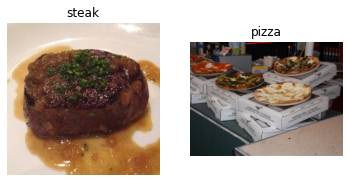

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subsert of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers

normalized_layer = layers.Rescaling(1./255)

In [ ]:
train_data = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    seed=42
).map(lambda x, y: (normalized_layer(x), y))

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    seed=42
).map(lambda x, y: (normalization_layer(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
images, labels = train_data.as_numpy_iterator().next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
images[:1], images[0].shape

(array([[[[0.4200343 , 0.21826607, 0.0646071 ],
          [0.42573532, 0.22396712, 0.07030813],
          [0.40404415, 0.20940128, 0.06526611],
          ...,
          [0.02177135, 0.02006294, 0.00930718],
          [0.00733047, 0.00671524, 0.        ],
          [0.00458801, 0.01289256, 0.        ]],
 
         [[0.414302  , 0.22429848, 0.06743573],
          [0.4171744 , 0.22717088, 0.07030813],
          [0.39822558, 0.21645035, 0.06603517],
          ...,
          [0.01253501, 0.00899231, 0.00468559],
          [0.0022735 , 0.00091178, 0.        ],
          [0.00340993, 0.01531221, 0.00430672]],
 
         [[0.40368024, 0.2308261 , 0.06806723],
          [0.4082283 , 0.23742497, 0.07364072],
          [0.40043646, 0.22755478, 0.07461361],
          ...,
          [0.01601891, 0.00133053, 0.00066526],
          [0.01333015, 0.01335391, 0.01384295],
          [0.        , 0.01111508, 0.0237375 ]],
 
         ...,
 
         [[0.02352941, 0.00717773, 0.00358887],
          [0.02717

### 3. Create a CNN model (start with baseline)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

**Note:** Look at CNN Explainer website to undersitand CNN's: https://poloclub.github.io/cnn-explainer/

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_5 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 6s 100ms/step - loss: 0.9645 - accuracy: 0.6867 - val_loss: 0.4624 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4516 - accuracy: 0.8007 - val_loss: 0.4154 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 93ms/step - loss: 0.3292 - accuracy: 0.8727 - val_loss: 0.3953 - val_accuracy: 0.8180
Epoch 4/5
47/47 [==============================] - 5s 93ms/step - loss: 0.1442 - accuracy: 0.9573 - val_loss: 0.4644 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 5s 94ms/step - loss: 0.0484 - accuracy: 0.9880 - val_loss: 0.4988 - val_accuracy: 0.8080


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 1s 53ms/step - loss: 0.3399 - accuracy: 0.8460


[0.33985182642936707, 0.8460000157356262]

### 5. Evaluating our model

Is looks like our model is learning something, let's evaluate it.

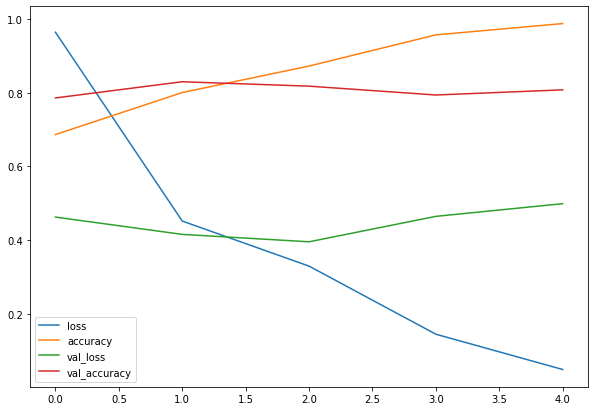

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_acc")
  plt.plot(epochs, val_accuracy, label="val_acc")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely taht the model is **overfitting** the training dataset. This means, it's learining the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be deminished.

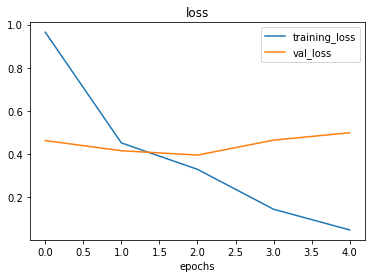

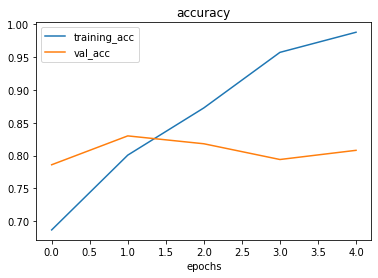

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the numver of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 166ms/step - loss: 0.6029 - accuracy: 0.6840 - val_loss: 0.5361 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4836 - accuracy: 0.7900 - val_loss: 0.4052 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 4s 86ms/step - loss: 0.4264 - accuracy: 0.8153 - val_loss: 0.3849 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4163 - accuracy: 0.8180 - val_loss: 0.3486 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.3966 - accuracy: 0.8340 - val_loss: 0.3371 - val_accuracy: 0.8560


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

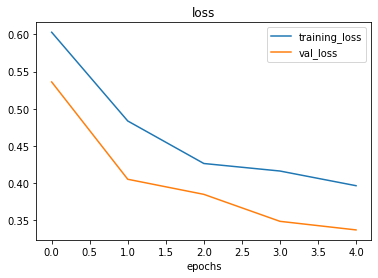

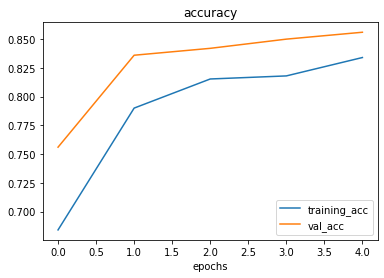

In [ ]:
plot_loss_curves(model_5.history)

### Opening our bag of tricks and finding data augmentation

In [ ]:
data_augmentation = Sequential([
    #layers.Rescaling(1./255),
    layers.RandomRotation(0.2),
    layers.RandomCrop(210, 210),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(0.2, 0.2),
    layers.RandomContrast(0.9)
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

rescale = layers.Rescaling(1./255)

train_data = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32,
    seed=42
).map(lambda x, y: (rescale(x), y))

train_data_aug = train_data.map(lambda x, y: (data_augmentation(x), y), 
      num_parallel_calls=AUTOTUNE).prefetch(buffer_size=AUTOTUNE)

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=32,
    seed=42
).map(lambda x, y: (rescale(x), y))

test_data_aug = test_data.map(lambda x, y: (data_augmentation(x), y), 
      num_parallel_calls=AUTOTUNE).prefetch(buffer_size=AUTOTUNE)

Found 1500 files belonging to 2 classes.


Found 500 files belonging to 2 classes.


In [ ]:
#import matplotlib.pyplot as plt
images, labels = next(iter(train_data))
labels
class_names[labels[0]]

'pizza'

32


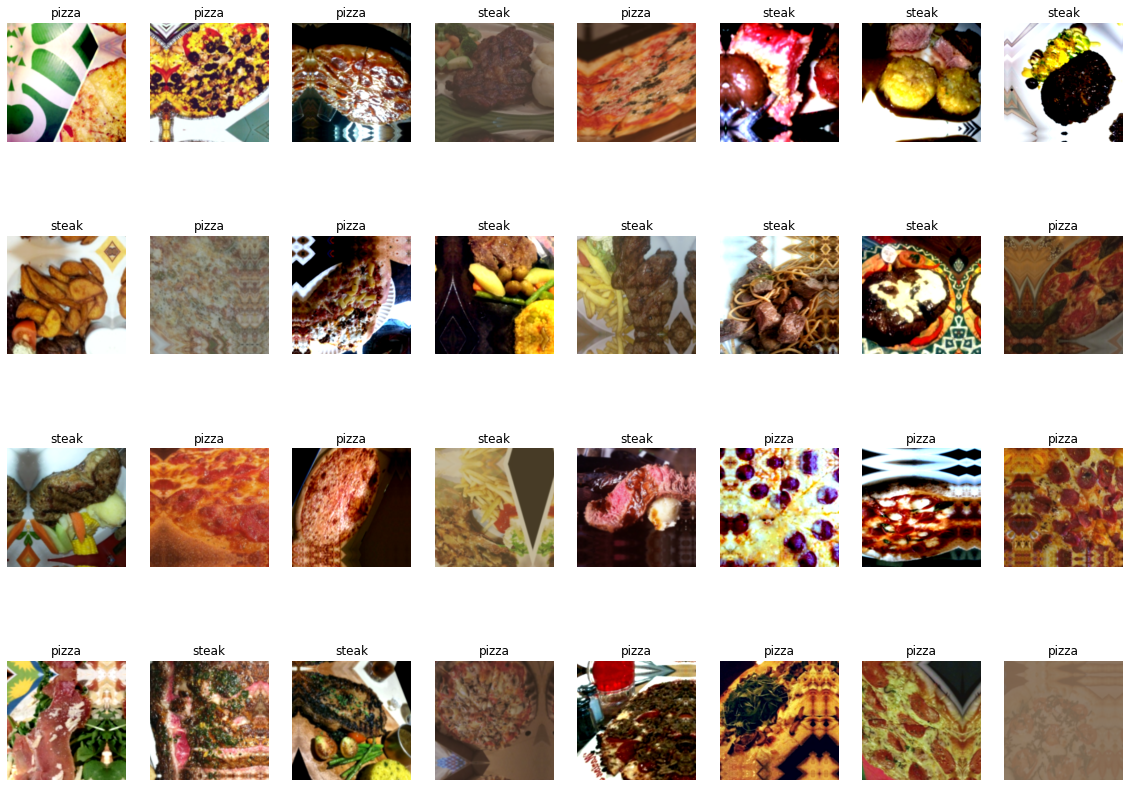

In [ ]:
images, labels = next(iter(train_data_aug))
print(len(images))

fig = plt.figure(figsize=(20, 15))

for idx in range(len(images)):
    ax = fig.add_subplot(4, 8, idx+1)
    ax.imshow(images[idx])
    ax.title.set_text(class_names[labels[idx]])
    ax.axis(False)

In [ ]:
image, label = next(iter(train_data))
print(image[0].shape)
data_augmentation(image[0]).shape

(224, 224, 3)


TensorShape([210, 210, 3])